In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from python_scripts.utilities import single_to_batch_results

# Merge all simulations to single results file

In [2]:
single_results_folder = "results/highd_simulations_pickle"
batch_results_path = "results/batch_results"

single_to_batch_results(single_results_folder, batch_results_path)

100%|██████████| 461/461 [04:46<00:00,  1.61it/s]


## Visualise all results

In [ ]:
batch_results_path = "results/batch_results"
batch_results = pd.read_pickle(batch_results_path)
filtered_results = batch_results[(batch_results.other_speed > 110/3.6)]

print_best = True
print_computational_times = True
# Heatmaps
plot_novel_baseline_max_scatter_filtered = True
plot_novel_baseline_avg_scatter_filtered = True
plot_novel_baseline_max_scatter = False
plot_novel_baseline_avg_scatter = False
plot_ntraffic_scatter = True
plot_ttc_scatter = True
plot_dhw_scatter = True
# Histograms
plot_max_speed_reduction = True
plot_average_speed_reduction = True
plot_integrated_speed_reduction = True

LABELSIZE = 12
TITLESIZE = 16
GAMMA = 0.35

print("The number of scenarios passing the filter: ", len(filtered_results.index))

In [390]:

if print_best:
    batch_results["improvement_min"] = batch_results["min_vel_novel"]-batch_results["min_vel_baseline"]
    batch_results["improvement_avg"] = batch_results["avg_vel_novel"]-batch_results["avg_vel_baseline"]
    best_result = batch_results[batch_results["improvement_min"] == batch_results["improvement_min"].max()]
    best_result_vavg = batch_results[batch_results["improvement_avg"] == batch_results["improvement_avg"].max()]
    print("Top 5 best improvements vmin: ", batch_results.sort_values(by=['improvement_min'], ascending=False)["scenario_id"].values[:5])
    print("Top 5 best improvements vavg: ", batch_results.sort_values(by=['improvement_avg'], ascending=False)["scenario_id"].values[:5])
    print("Selection of no improvements: ", batch_results.sort_values(by=['improvement_min'], ascending=True)["scenario_id"].values[:5], "\n")

    print("Best vmin scenario improved vmin by ", best_result["improvement_min"].values[0]*3.6, "kmh, from ", (best_result["min_vel_ideal"].values[0] - best_result["min_vel_novel"].values[0])*3.6 ," to ", (best_result["min_vel_ideal"].values[0] - best_result["min_vel_baseline"].values[0])*3.6)
    print("And improved vavg by ", best_result["improvement_avg"].values[0]*3.6, " kmh")

    print("Best vavg scenario improved vmin by ", best_result_vavg["improvement_min"].values[0]*3.6, "kmh")
    print("And improved vavg by ", best_result_vavg["improvement_avg"].values[0]*3.6, " kmh")
    
    
    print("Number of scenarios where x0 merging car < x0 ego: ", np.sum(batch_results["is_overtake"]), "\n")
    print("Number of scenarios with improvement: ", len(batch_results[batch_results["improvement_min"] > 0].index))
    
    print("Average improvement min vel: ", np.mean(batch_results["improvement_min"].values)*3.6, " kmh")
    print("Average improvement min vel given there is improvement: ", np.mean(batch_results[batch_results["improvement_min"] > 0]["improvement_min"].values)*3.6, " kmh")
    print("Average improvement avg vel: ", np.mean(batch_results["improvement_avg"].values)*3.6, " kmh")
    print("Average improvement avg vel given there is improvement: ", np.mean(batch_results[batch_results["improvement_avg"] > 0]["improvement_avg"].values)*3.6, " kmh")

    print("Number of zero braking novel: ", len(batch_results[batch_results["min_vel_novel"] == batch_results["min_vel_ideal"]]))
    print("Number of zero braking baseline: ", len(batch_results[batch_results["min_vel_baseline"] == batch_results["min_vel_ideal"]]))
    print("Number of >20kmh braking novel: ", len(batch_results[batch_results["min_vel_ideal"] - batch_results["min_vel_novel"] > 20/3.6]))
    print("Number of >20kmh braking baseline: ", len(batch_results[batch_results["min_vel_ideal"] - batch_results["min_vel_baseline"] > 20/3.6]))

    print("\n FILTERED RESULTS:")
    filtered_results["improvement_min"] = filtered_results["min_vel_novel"]-filtered_results["min_vel_baseline"]
    filtered_results["improvement_avg"] = filtered_results["avg_vel_novel"]-filtered_results["avg_vel_baseline"]
    print("Number of scenarios with improvement: ", len(filtered_results[filtered_results["improvement_min"] > 0].index))
    
    print("Average improvement min vel: ", np.mean(filtered_results["improvement_min"].values)*3.6, " kmh")
    print("Average improvement min vel given there is improvement: ", np.mean(filtered_results[filtered_results["improvement_min"] > 0]["improvement_min"].values)*3.6, " kmh")
    print("Average improvement avg vel: ", np.mean(filtered_results["improvement_avg"].values)*3.6, " kmh")
    print("Average improvement avg vel given there is improvement: ", np.mean(filtered_results[filtered_results["improvement_avg"] > 0]["improvement_avg"].values)*3.6, " kmh")

    print("Number of zero braking novel: ", len(filtered_results[filtered_results["min_vel_novel"] == filtered_results["min_vel_ideal"]]))
    print("Number of zero braking baseline: ", len(filtered_results[filtered_results["min_vel_baseline"] == filtered_results["min_vel_ideal"]]))
    print("Number of >20kmh braking novel: ", len(filtered_results[filtered_results["min_vel_ideal"] - filtered_results["min_vel_novel"] > 20/3.6]))
    print("Number of >20kmh braking baseline: ", len(filtered_results[filtered_results["min_vel_ideal"] - filtered_results["min_vel_baseline"] > 20/3.6]))

Top 5 best improvements vmin:  ['ZAM_HighD-51_1_T-1' 'ZAM_HighD-16_2_T-1' 'ZAM_HighD-48_11_T-1'
 'ZAM_HighD-6_3_T-1' 'ZAM_HighD-2_1_T-1']
Top 5 best improvements vavg:  ['ZAM_HighD-48_11_T-1' 'ZAM_HighD-6_3_T-1' 'ZAM_HighD-51_1_T-1'
 'ZAM_HighD-7_1_T-1' 'ZAM_HighD-48_7_T-1']
Selection of no improvements:  ['ZAM_HighD-36_4_T-1' 'ZAM_HighD-8_6_T-1' 'ZAM_HighD-34_2_T-1'
 'ZAM_HighD-43_1_T-1' 'ZAM_HighD-46_9_T-1'] 

Best vmin scenario improved vmin by  18.0 kmh, from  3.6  to  21.6
And improved vavg by  5.011162932479796  kmh
Best vavg scenario improved vmin by  18.0 kmh
And improved vavg by  8.750577777777742  kmh
Number of scenarios where x0 merging car < x0 ego:  17 

Number of scenarios with improvement:  149
Average improvement min vel:  2.5125900216919743  kmh
Average improvement min vel given there is improvement:  7.77385234899329  kmh
Average improvement avg vel:  0.5710955141961573  kmh
Average improvement avg vel given there is improvement:  1.4428704774287917  kmh
Number of zer

/tmp/ipykernel_1154796/4123991142.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results["improvement_min"] = filtered_results["min_vel_novel"]-filtered_results["min_vel_baseline"]
/tmp/ipykernel_1154796/4123991142.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results["improvement_avg"] = filtered_results["avg_vel_novel"]-filtered_results["avg_vel_baseline"]


In [204]:

if print_computational_times:
    print("The average computational time for the update step is: ", np.average(filtered_results["comp_time_update"]), " s")
    print("The average computational time for the prediction step is: ", np.average(filtered_results["comp_time_predict"]), " s")
    print("The median computational time for the update step is: ", np.median(filtered_results["comp_time_update"]), " s")
    print("The median computational time for the prediction step is: ", np.median(filtered_results["comp_time_predict"]), " s")

The average computational time for the update step is:  0.14600096067409726  s
The average computational time for the prediction step is:  2.143636638288688  s
The median computational time for the update step is:  0.12888330438043477  s
The median computational time for the prediction step is:  1.9819070967391301  s


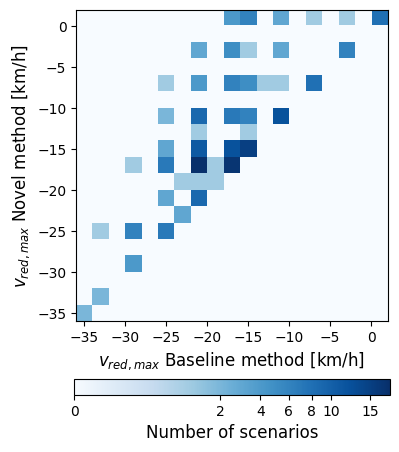

In [389]:

if plot_novel_baseline_max_scatter_filtered:
    scatter_data = [(filtered_results["min_vel_baseline"] - filtered_results["min_vel_ideal"])*3.6,
                    (filtered_results["min_vel_novel"] - filtered_results["min_vel_ideal"])*3.6]
    
    heatmap, xedges, yedges = np.histogram2d(scatter_data[0], scatter_data[1], range=[[-36, 2], [-36, 2]], bins=19)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    fig = plt.figure(figsize=(5,5))
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues, norm=colors.PowerNorm(gamma=GAMMA))
    #plt.hexbin(scatter_data[0], scatter_data[1], gridsize=15, cmap=cm.Blues)
    plt.xlabel(r"$v_{red,max}$ Baseline method [km/h]", fontsize=LABELSIZE)
    plt.ylabel(r"$v_{red,max}$ Novel method [km/h]", fontsize=LABELSIZE)
    plt.gca().set_aspect('equal')
    cbar = plt.colorbar(fraction=0.041, pad=0.15, orientation="horizontal")
    cbar.ax.set_xlabel('Number of scenarios', fontsize=LABELSIZE)
    cbar.ax.set_xticks([0,2,4,6,8,10,15])
    plt.gca().set_xticks([-35,-30,-25,-20,-15,-10,-5,0])
    
    #plt.title("Heatmap of maximal speed reduction in km/h", fontsize=TITLESIZE)

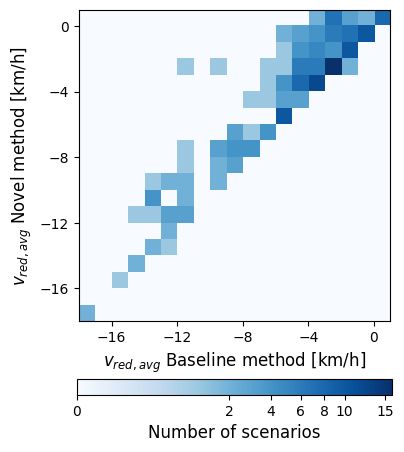

In [348]:

if plot_novel_baseline_avg_scatter_filtered:
    scatter_data = [(filtered_results["avg_vel_baseline"] - filtered_results["avg_vel_ideal"])*3.6,
                    (filtered_results["avg_vel_novel"] - filtered_results["avg_vel_ideal"])*3.6]
    
    heatmap, xedges, yedges = np.histogram2d(scatter_data[0], scatter_data[1], range=[[-18, 1], [-18, 1]], bins=19)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    fig = plt.figure(figsize=(5,5))
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues, norm=colors.PowerNorm(gamma=GAMMA))
    #plt.hexbin(scatter_data[0], scatter_data[1], gridsize=15, cmap=cm.Blues)
    plt.xlabel(r"$v_{red,avg}$ Baseline method [km/h]", fontsize=LABELSIZE)
    plt.ylabel(r"$v_{red,avg}$ Novel method [km/h]", fontsize=LABELSIZE)
    plt.gca().set_aspect('equal')
    plt.gca().set_xticks([-14,-12,-10,-8,-6,-4,-2,0])
    cbar = plt.colorbar(fraction=0.041, pad=0.15, orientation="horizontal")
    cbar.ax.set_xticks([0,2,4,6,8,10,15])
    cbar.ax.set_xlabel('Number of scenarios', fontsize=LABELSIZE)
    plt.gca().set_xticks([-16,-12,-8,-4,0])
    plt.gca().set_yticks([-16,-12,-8,-4,0])
    #plt.title("Heatmap of average speed reduction in km/h", fontsize=TITLESIZE)

Text(0, 0.5, 'Number of scenarios')

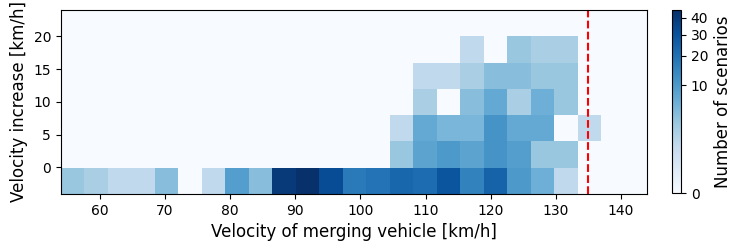

In [392]:

scatter_data = [batch_results["other_speed"]*3.6,
                (batch_results["min_vel_novel"] - batch_results["min_vel_baseline"])*3.6]
heatmap, xedges, yedges = np.histogram2d(scatter_data[0], scatter_data[1], range=[[15*3.6,40*3.6],[-3.99999,24.0001]], bins=[25,7])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig = plt.figure(figsize=(8,5))
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues, norm=colors.PowerNorm(gamma=GAMMA))
plt.xlabel("Velocity of merging vehicle [km/h]", fontsize=LABELSIZE)
plt.ylabel("Velocity increase [km/h]", fontsize=LABELSIZE)
plt.gca().set_aspect(7*3.6/25)
plt.plot([135,135],[-4, 24], 'r--')
cbar = plt.colorbar(fraction=0.045*8.2/25, pad=0.04)
cbar.ax.set_ylabel('Number of scenarios', fontsize=LABELSIZE)

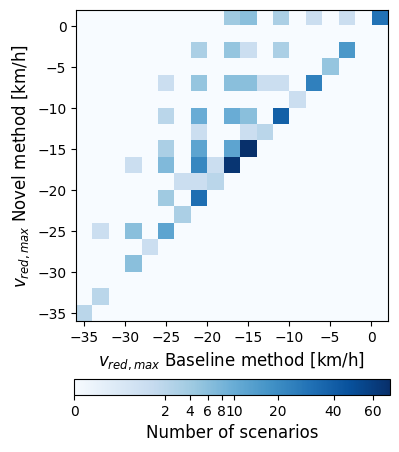

In [341]:

if plot_novel_baseline_max_scatter:
    scatter_data = [(batch_results["min_vel_baseline"] - batch_results["min_vel_ideal"])*3.6,
                    (batch_results["min_vel_novel"] - batch_results["min_vel_ideal"])*3.6]
    
    heatmap, xedges, yedges = np.histogram2d(scatter_data[0], scatter_data[1], range=[[-36, 2], [-36, 2]], bins=19)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    fig = plt.figure(figsize=(5,5))
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues, norm=colors.PowerNorm(gamma=GAMMA))
    #plt.hexbin(scatter_data[0], scatter_data[1], gridsize=15, cmap=cm.Blues)
    plt.xlabel(r"$v_{red,max}$ Baseline method [km/h]", fontsize=LABELSIZE)
    plt.ylabel(r"$v_{red,max}$ Novel method [km/h]", fontsize=LABELSIZE)
    plt.gca().set_aspect('equal')
    cbar = plt.colorbar(fraction=0.041, pad=0.15, orientation="horizontal")
    cbar.ax.set_xlabel('Number of scenarios', fontsize=LABELSIZE)
    cbar.ax.set_xticks([0,2,4,6,8,10,20,40,60])
    plt.gca().set_xticks([-35,-30,-25,-20,-15,-10,-5,0])
    #plt.title("Heatmap of maximal speed reduction in km/h", fontsize=TITLESIZE)

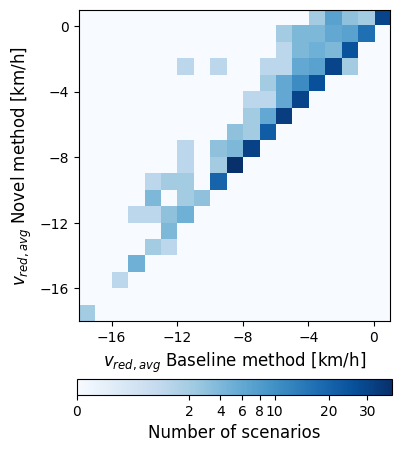

In [346]:

if plot_novel_baseline_avg_scatter:
    scatter_data = [(batch_results["avg_vel_baseline"] - batch_results["avg_vel_ideal"])*3.6,
                    (batch_results["avg_vel_novel"] - batch_results["avg_vel_ideal"])*3.6]
    
    heatmap, xedges, yedges = np.histogram2d(scatter_data[0], scatter_data[1], range=[[-18, 1], [-18, 1]], bins=19)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    fig = plt.figure(figsize=(5,5))
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues, norm=colors.PowerNorm(gamma=GAMMA))
    #plt.hexbin(scatter_data[0], scatter_data[1], gridsize=15, cmap=cm.Blues)
    plt.xlabel(r"$v_{red,avg}$ Baseline method [km/h]", fontsize=LABELSIZE)
    plt.ylabel(r"$v_{red,avg}$ Novel method [km/h]", fontsize=LABELSIZE)
    plt.gca().set_aspect('equal')
    cbar = plt.colorbar(fraction=0.041, pad=0.15, orientation="horizontal")
    cbar.ax.set_xlabel('Number of scenarios', fontsize=LABELSIZE)
    cbar.ax.set_xticks([0,2,4,6,8,10,20,30])
    plt.gca().set_xticks([-16,-12,-8,-4,0])
    plt.gca().set_yticks([-16,-12,-8,-4,0])
    #plt.title("Heatmap of average speed reduction in km/h", fontsize=TITLESIZE)

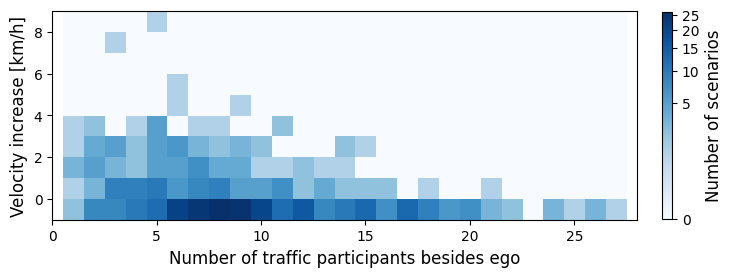

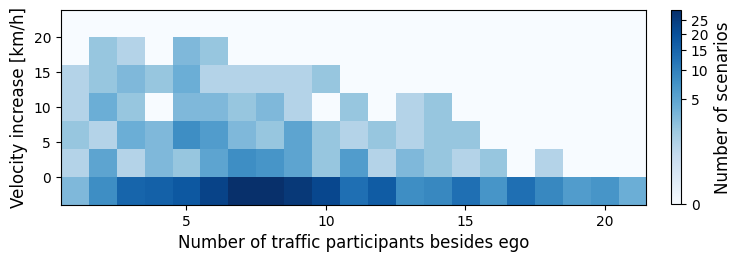

In [330]:

if plot_ntraffic_scatter:
    scatter_data = [batch_results["number_of_traffic"],
                    (batch_results["avg_vel_novel"] - batch_results["avg_vel_baseline"])*3.6]
    heatmap, xedges, yedges = np.histogram2d(scatter_data[0], scatter_data[1], range=[[0.5, 27.5],[-0.9999,9.0001]], bins=[27,10])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    fig = plt.figure(figsize=(8,5))
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues, norm=colors.PowerNorm(gamma=GAMMA))
    plt.xlabel("Number of traffic participants besides ego", fontsize=LABELSIZE)
    plt.ylabel("Velocity increase [km/h]", fontsize=LABELSIZE)
    plt.xlim(0,28)
    plt.gca().set_aspect('equal')
    cbar = plt.colorbar(fraction=0.045*10/27, pad=0.04)
    cbar.ax.set_ylabel('Number of scenarios', fontsize=LABELSIZE)
    #plt.title("Average velocity increase of novel method over baseline", fontsize=TITLESIZE)

    scatter_data = [batch_results["number_of_traffic"],
                    (batch_results["min_vel_novel"] - batch_results["min_vel_baseline"])*3.6]
    heatmap, xedges, yedges = np.histogram2d(scatter_data[0], scatter_data[1], range=[[0.5, 27.5],[-3.9999,24.0001]], bins=[27,7])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    fig = plt.figure(figsize=(8,5))
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues, norm=colors.PowerNorm(gamma=GAMMA))
    plt.xlabel("Number of traffic participants besides ego", fontsize=LABELSIZE)
    plt.ylabel("Velocity increase [km/h]", fontsize=LABELSIZE)
    plt.xlim(0.5,21.5)
    plt.gca().set_xticks([5,10,15,20])
    plt.gca().set_aspect(0.25)
    cbar = plt.colorbar(fraction=0.045*9.4/27, pad=0.04)
    cbar.ax.set_ylabel('Number of scenarios', fontsize=LABELSIZE)

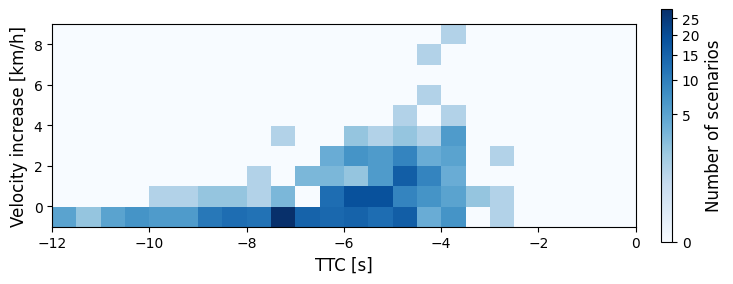

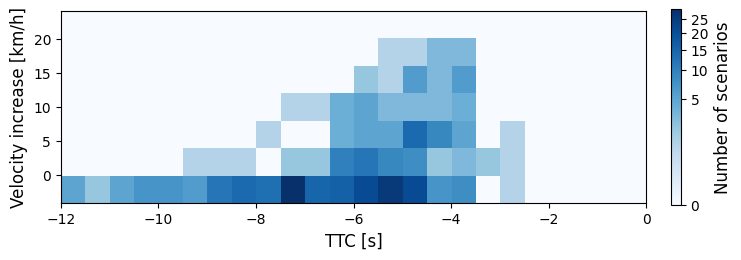

In [238]:

if plot_ttc_scatter:
    scatter_data = [batch_results["merge_ttc"],
                    (batch_results["avg_vel_novel"] - batch_results["avg_vel_baseline"])*3.6]
    heatmap, xedges, yedges = np.histogram2d(scatter_data[0], scatter_data[1], range=[[-12,0],[-0.9999,9.0001]], bins=[24,10])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    fig = plt.figure(figsize=(8,5))
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues, norm=colors.PowerNorm(gamma=GAMMA))
    plt.xlabel("TTC [s]", fontsize=LABELSIZE)
    plt.ylabel("Velocity increase [km/h]", fontsize=LABELSIZE)
    plt.gca().set_aspect(10/24)
    cbar = plt.colorbar(fraction=0.045*10/24, pad=0.04)
    cbar.ax.set_ylabel('Number of scenarios', fontsize=LABELSIZE)
    #plt.title("Average velocity increase of novel method over baseline", fontsize=TITLESIZE)

    scatter_data = [batch_results["merge_ttc"],
                    (batch_results["min_vel_novel"] - batch_results["min_vel_baseline"])*3.6]
    heatmap, xedges, yedges = np.histogram2d(scatter_data[0], scatter_data[1], range=[[-12,0],[-3.99999,24.0001]], bins=[24,7])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    fig = plt.figure(figsize=(8,5))
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues, norm=colors.PowerNorm(gamma=GAMMA))
    plt.xlabel("TTC [s]", fontsize=LABELSIZE)
    plt.ylabel("Velocity increase [km/h]", fontsize=LABELSIZE)
    #plt.ylim([-2,20])
    plt.gca().set_aspect(0.14)
    cbar = plt.colorbar(fraction=0.045*8.4/24, pad=0.04)
    cbar.ax.set_ylabel('Number of scenarios', fontsize=LABELSIZE)
    #plt.title("Increase of minimal velocity novel method over baseline", fontsize=TITLESIZE)

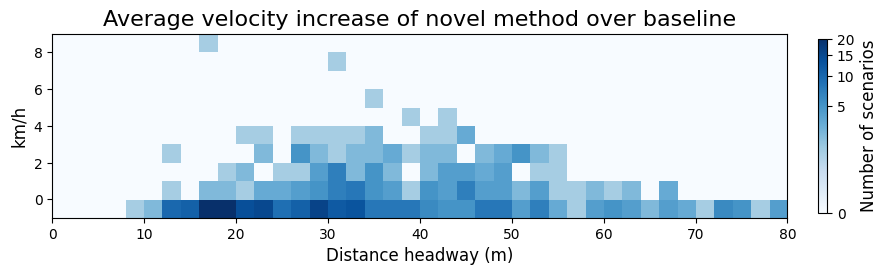

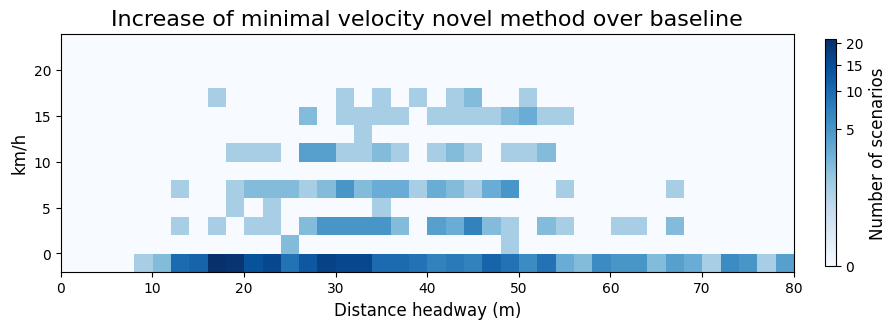

In [162]:

if plot_dhw_scatter:
    scatter_data = [batch_results["merge_dhw"],
                    (batch_results["avg_vel_novel"] - batch_results["avg_vel_baseline"])*3.6]
    heatmap, xedges, yedges = np.histogram2d(scatter_data[0], scatter_data[1], range=[[0,80],[-0.9999,9.0001]], bins=[40,10])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    fig = plt.figure(figsize=(10,6))
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues, norm=colors.PowerNorm(gamma=GAMMA))
    plt.xlabel("Distance headway (m)", fontsize=LABELSIZE)
    plt.ylabel("km/h", fontsize=LABELSIZE)
    plt.gca().set_aspect(2)
    cbar = plt.colorbar(fraction=0.045*10/40, pad=0.04)
    cbar.ax.set_ylabel('Number of scenarios', fontsize=LABELSIZE)
    plt.title("Average velocity increase of novel method over baseline", fontsize=TITLESIZE)

    scatter_data = [batch_results["merge_dhw"],
                    (batch_results["min_vel_novel"] - batch_results["min_vel_baseline"])*3.6]
    heatmap, xedges, yedges = np.histogram2d(scatter_data[0], scatter_data[1], range=[[0,80],[-1.9999,24.0001]], bins=[40,13])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    fig = plt.figure(figsize=(10,6))
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues, norm=colors.PowerNorm(gamma=GAMMA))
    plt.xlabel("Distance headway (m)", fontsize=LABELSIZE)
    plt.ylabel("km/h", fontsize=LABELSIZE)
    plt.gca().set_aspect(1)
    cbar = plt.colorbar(fraction=0.045*13/40, pad=0.04)
    cbar.ax.set_ylabel('Number of scenarios', fontsize=LABELSIZE)
    plt.title("Increase of minimal velocity novel method over baseline", fontsize=TITLESIZE)

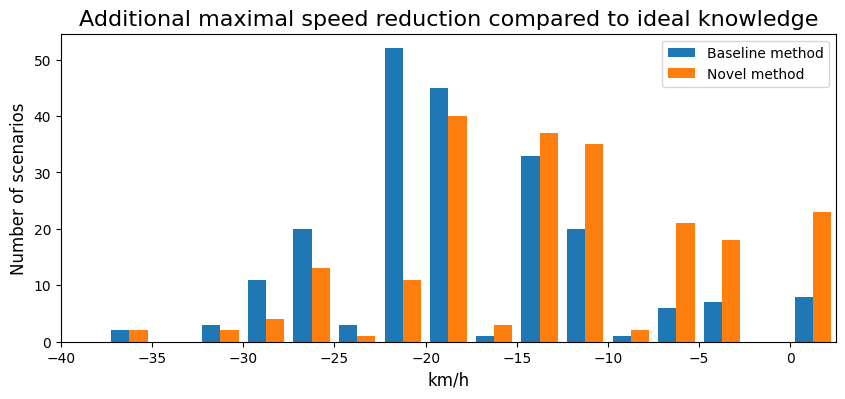

The average max speed reduction for the novel method is:  -13.00111017936175  km/h
The average max speed reduction for the baseline method is:  -17.836506405776845  km/h
The median max speed reduction for the novel method is:  -14.4  km/h
The median max speed reduction for the baseline method is:  -18.0  km/h


In [327]:

if plot_max_speed_reduction:
    fig = plt.figure(figsize=(10,4))
    plt.hist([(filtered_results["min_vel_baseline"] - filtered_results["min_vel_ideal"])*3.6,
              (filtered_results["min_vel_novel"] - filtered_results["min_vel_ideal"])*3.6], 
             np.arange(-40.0001, 3,2.5),
             label = ["novel method", "baseline method"])
    plt.title("Additional maximal speed reduction compared to ideal knowledge", fontsize=TITLESIZE)
    plt.xlabel("km/h", fontsize=LABELSIZE)
    plt.ylabel("Number of scenarios", fontsize=LABELSIZE)
    plt.legend(["Baseline method", "Novel method"])
    plt.xlim([-40,2.5])
    plt.show()
    print("The average max speed reduction for the novel method is: ", np.average((filtered_results["min_vel_novel"] - filtered_results["min_vel_ideal"])*3.6), " km/h")
    print("The average max speed reduction for the baseline method is: ", np.average((filtered_results["min_vel_baseline"] - filtered_results["min_vel_ideal"])*3.6), " km/h")
    print("The median max speed reduction for the novel method is: ", np.median((filtered_results["min_vel_novel"] - filtered_results["min_vel_ideal"])*3.6), " km/h")
    print("The median max speed reduction for the baseline method is: ", np.median((filtered_results["min_vel_baseline"] - filtered_results["min_vel_ideal"])*3.6), " km/h")

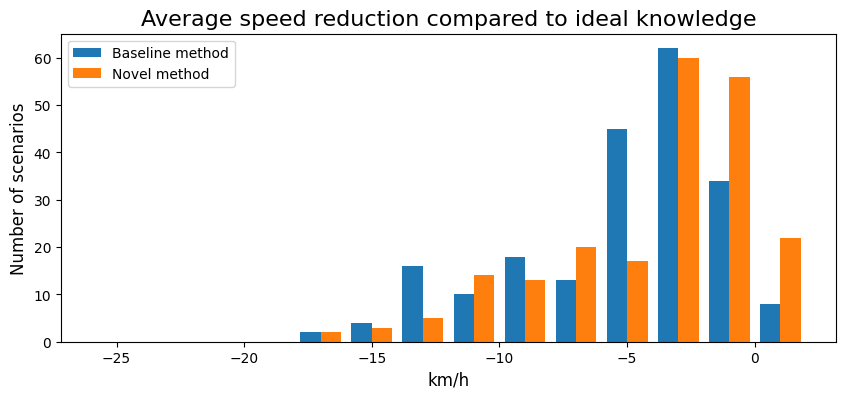

The average average speed reduction for the novel method is:  -4.141534413004282  km/h
The average average speed reduction for the baseline method is:  -5.251897934760557  km/h
The median average speed reduction for the novel method is:  -2.783899266418013  km/h
The median average speed reduction for the baseline method is:  -4.057511111111102  km/h


In [328]:

if plot_average_speed_reduction:
    fig = plt.figure(figsize=(10,4))
    plt.hist([(filtered_results["avg_vel_baseline"] - filtered_results["avg_vel_ideal"])*3.6,
              (filtered_results["avg_vel_novel"] - filtered_results["avg_vel_ideal"])*3.6], 
             np.arange(-26.0001, 2.9999,2),
             label = ["Baseline method", "Novel method"])
    plt.title("Average speed reduction compared to ideal knowledge", fontsize=TITLESIZE)
    plt.xlabel("km/h", fontsize=LABELSIZE)
    plt.ylabel("Number of scenarios", fontsize=LABELSIZE)
    plt.legend(["Baseline method", "Novel method"])
    plt.show()
    print("The average average speed reduction for the novel method is: ", np.average((filtered_results["avg_vel_novel"] - filtered_results["avg_vel_ideal"])*3.6), " km/h")
    print("The average average speed reduction for the baseline method is: ", np.average((filtered_results["avg_vel_baseline"] - filtered_results["avg_vel_ideal"])*3.6), " km/h")
    print("The median average speed reduction for the novel method is: ", np.median((filtered_results["avg_vel_novel"] - filtered_results["avg_vel_ideal"])*3.6), " km/h")
    print("The median average speed reduction for the baseline method is: ", np.median((filtered_results["avg_vel_baseline"] - filtered_results["avg_vel_ideal"])*3.6), " km/h")

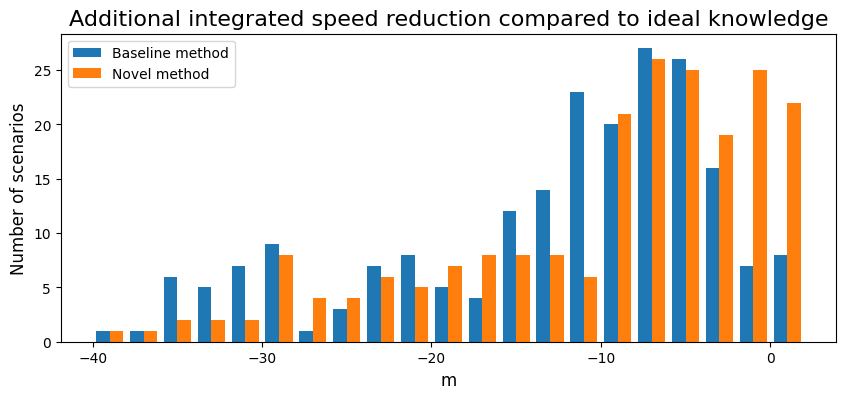

In [329]:

if plot_integrated_speed_reduction:
    fig = plt.figure(figsize=(10,4))
    plt.hist([filtered_results["integrated_vel_reduction_baseline"] - filtered_results["integrated_vel_reduction_ideal"],
              filtered_results["integrated_vel_reduction_novel"] - filtered_results["integrated_vel_reduction_ideal"]], 
             np.arange(-40.0001, 3.9999,2),
             label = ["novel method", "baseline method"])
    plt.title("Additional integrated speed reduction compared to ideal knowledge", fontsize=TITLESIZE)
    plt.xlabel("m", fontsize=LABELSIZE)
    plt.ylabel("Number of scenarios", fontsize=LABELSIZE)
    plt.legend(["Baseline method", "Novel method"])
    plt.show()